In [2]:
# Helpful statement for debugging, prints the thing entered as x and the output, i.e.,
# debugPrint(1+1) will output '1+1 [int] = 2'
import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
    
    
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm.notebook import trange, tqdm
import yaml
%matplotlib notebook
import warnings
warnings.filterwarnings(action='once')
from datetime import datetime

import torch
from torch_geometric.nn import radius
from torch_geometric.nn import SplineConv, fps, global_mean_pool, radius_graph, radius
from torch_scatter import scatter

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from src.config import *
from src.plotting import *
from src.compressible import compressibleSimulation
from src.incompressible import incompressibleSimulation
from src.scenarios import *
from src.solidBC import *


In [3]:
def getVelocityXY(config, simulationState, nx = 256, ny = 256):
    xx,yy,uv = getUVs(simulationState['fluidVelocity'], config, simulationState, nx,ny)
    data = np.linalg.norm(uv,axis=2)
    return data
def getVelocityScatter(config, simulationState):
    return simulationState['fluidPosition'].detach().cpu().numpy(), \
        np.linalg.norm(simulationState['fluidVelocity'].detach().cpu().numpy(), axis = 1)

xyPlotFn = lambda config, state, nx, ny: getVelocityXY(config, state, nx = 256, ny = 256)
scatterPlotFn = lambda config, state: getVelocityScatter(config, state)

In [4]:
# simFn = lambda config, state: compressibleSimulation(config, state)


# config = getShockwaveConfig(dt=0.005, radius = 0.01, c = .2, device = 'cpu', precision= torch.float32)
# state, stepFn = setupSimulation(config, simFn, xyPlotFn, 256, 256)

# interact_manual(stepFn,steps=widgets.IntSlider(min=1, max=512, step=1));

In [5]:
# simFn = lambda config, state: incompressibleSimulation(config, state)


# config = getTriangleBoundaryImpactConfig(device= 'cpu', precision = torch.float64)
# state, stepFn = setupSimulation(config, simFn, scatterPlotFn, 256, 256)

# interact_manual(stepFn,steps=widgets.IntSlider(min=1, max=512, step=1));

In [6]:
# i = torch.argmax(state['fluidPosition'][:,0])
# printParticle(i, state)
# bi = torch.argmax(state['boundary alpha'])
# printBoundaryParticle(bi, state)

In [7]:
# nx = 64
# ny = 64
# x = np.linspace(config['domain']['min'][0],config['domain']['max'][0],nx)
# y = np.linspace(config['domain']['min'][1],config['domain']['max'][1],ny)

# xx, yy = np.meshgrid(x, y)

# xf = xx.flatten()
# yf = yy.flatten()

# gridPositions = torch.from_numpy(np.c_[xf, yf]).type(config['precision']).to(config['device'])

# res = np.zeros_like(xf)
# resx = np.zeros_like(xf)
# resy = np.zeros_like(yf)

# for b in config['solidBoundary']:
#     polygon = b['polygon']
#     sdf, sdfgrad, b, bgrad = sdPolyDerAndIntegral(polygon, gridPositions, config)
#     print(sdf[torch.isnan(sdfgrad)[:,0]])
#     sdf = torch.clamp(sdf / config['support'], min = -1, max = 1)
    
#     res += sdf.detach().cpu().numpy()
#     resx += sdfgrad[:,0].detach().cpu().numpy()
#     resy += sdfgrad[:,1].detach().cpu().numpy()
    

# resAutograd = np.zeros_like(xf)
# resAutogradx = np.zeros_like(xf)
# resAutogrady = np.zeros_like(yf)

# for b in config['solidBoundary']:
#     polygon = b['polygon']
#     sdf, sdfgrad, b, bgrad = sdPolyDerAndIntegralAutograd(polygon, gridPositions, config)
#     print(sdf[torch.isnan(sdfgrad)[:,0]])
#     sdf = torch.clamp(sdf / config['support'], min = -1, max = 1)
    
#     sdfgrad /= torch.linalg.norm(sdfgrad, axis = 1)[:,None]
    
#     resAutograd += sdf.detach().cpu().numpy()
#     resAutogradx += sdfgrad[:,0].detach().cpu().numpy()
#     resAutogrady += sdfgrad[:,1].detach().cpu().numpy()
    


# fig, axis = plt.subplots(3,3, figsize=(9,9), sharex = True, sharey = True, squeeze = False)


# im = axis[0,0].imshow(res.reshape(nx,ny), extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[0,0], config)
# plotDomain(axis[0,0], config)
# ax1_divider = make_axes_locatable(axis[0,0])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# im = axis[0,1].imshow(resx.reshape(nx,ny), extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[0,1], config)
# plotDomain(axis[0,1], config)
# ax1_divider = make_axes_locatable(axis[0,1])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# im = axis[0,2].imshow(resy.reshape(nx,ny), extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[0,2], config)
# plotDomain(axis[0,2], config)
# ax1_divider = make_axes_locatable(axis[0,2])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# im = axis[1,0].imshow(resAutograd.reshape(nx,ny), extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[1,0], config)
# plotDomain(axis[1,0], config)
# ax1_divider = make_axes_locatable(axis[1,0])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# im = axis[1,1].imshow(resAutogradx.reshape(nx,ny), extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[1,1], config)
# plotDomain(axis[1,1], config)
# ax1_divider = make_axes_locatable(axis[1,1])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# im = axis[1,2].imshow(resAutogrady.reshape(nx,ny), extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[1,2], config)
# plotDomain(axis[1,2], config)
# ax1_divider = make_axes_locatable(axis[1,2])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# im = axis[2,0].imshow((resAutograd.reshape(nx,ny) - res.reshape(nx,ny))**2, extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[2,0], config)
# plotDomain(axis[2,0], config)
# ax1_divider = make_axes_locatable(axis[2,0])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# im = axis[2,1].imshow((resAutogradx.reshape(nx,ny) - resx.reshape(nx,ny))**2, extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[2,1], config)
# plotDomain(axis[2,1], config)
# ax1_divider = make_axes_locatable(axis[2,1])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# im = axis[2,2].imshow((resAutogrady.reshape(nx,ny) - resy.reshape(nx,ny))**2, extent=(config['domain']['min'][0],config['domain']['max'][0],config['domain']['min'][1],config['domain']['max'][1]))

# plotBoundary(axis[2,2], config)
# plotDomain(axis[2,2], config)
# ax1_divider = make_axes_locatable(axis[2,2])
# cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
# cb1 = fig.colorbar(im, cax=cax1,orientation='vertical')
# cb1.ax.tick_params(labelsize=8) 

# fig.tight_layout()

In [8]:
# import numpy as np
# import torch
# from scipy.optimize import minimize

# from generation import *
# from config import *


In [9]:
naca = '''1.00000	 0.00126
0.95000	 0.00807
0.90000	 0.01448
0.85000	 0.02053
0.80000	 0.02623
0.75000	 0.03160
0.70000	 0.03664
0.65000	 0.04133
0.60000	 0.04563
0.55000	 0.04952
0.50000	 0.05294
0.44900	 0.05588
0.39900	 0.05808
0.34900	 0.05951
0.29900	 0.06002
0.27500	 0.06048
0.25000	 0.06084
0.22500	 0.06100
0.20000	 0.06087
0.17500	 0.06033
0.15000	 0.05924
0.12500	 0.05740
0.10000	 0.05454
0.08000	 0.05121
0.06000	 0.04655
0.05000	 0.04351
0.04000	 0.03982
0.03000	 0.03522
0.02000	 0.02925
0.01000	 0.02074
0.00500	 0.01438
0.00000	 0.00000
0.00500 -0.01438
0.01000	-0.02074
0.02000	-0.02925
0.03000	-0.03522
0.04000	-0.03982
0.05000	-0.04351
0.06000	-0.04655
0.08000	-0.05121
0.10000	-0.05454
0.12500	-0.05740
0.15000	-0.05924
0.17500	-0.06033
0.20000	-0.06087
0.22500	-0.06100
0.25000	-0.06084
0.27500	-0.06048
0.29900	-0.06002
0.34900	-0.05951
0.39900	-0.05808
0.44900	-0.05588
0.50000	-0.05294
0.55000	-0.04952
0.60000	-0.04563
0.65000	-0.04133
0.70000	-0.03664
0.75000	-0.03160
0.80000	-0.02623
0.85000	-0.02053
0.90000	-0.01448
0.95000	-0.00807
1.00000	-0.00126'''

rows = naca.split('\n')
coords = [list(filter(None, r.replace('\t',' ').split(' '))) for r in rows]
vertices = []
for row in coords:
#     print(row)
#     print(list(filter(None, row)))
    vertices.append([float(v) for v in row])
#     print(row)
vertices = np.array(vertices) * 2

theta = np.radians(-0)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
# print(vertices.shape)
vertices = np.array([R.dot(vertex) for vertex in vertices])
# print(vertices.shape)
vertices[:,0] -= 0.5
# vertices[:,1] += 0.5
vertices = vertices.tolist()

# print(vertices)

In [10]:
def evalContrib(arg, config):
    s = torch.tensor(arg, dtype=config['precision'], device = config['device'])
    centralPosition = torch.tensor([[0,0]], device = config['device'], dtype=config['precision'])

    sdf, sdfGrad, b, bGrad = sdPolyDerAndIntegral(\
            torch.tensor([\
                [ -config['support'] * 2, -config['support'] * 2],\
                [  config['support'] * 2, -config['support'] * 2],\
                [  config['support'] * 2,  s],\
                [ -config['support'] * 2,  s],\
                         ], dtype= config['precision'], device = config['device']),\
            centralPosition, config
    )

    return b

In [11]:

# def adjustDomainForEmitters(config, fixSizes = True):
#     with record_function('config - adjusting domain'):
#         config['domain']['virtualMin'] = config['domain']['min']
#         config['domain']['virtualMax'] = config['domain']['max']
#         config['domain']['min'] = config['domain']['min'] - config['support'] * config['domain']['buffer']
#         config['domain']['max'] = config['domain']['max'] + config['support'] * config['domain']['buffer']
        

In [13]:
from src.solidBC import *

def nonperiodicBoundaryImpactConfig(radius = 0.014807730670234377, dt = 0.002, c = 0.25, device = 'cpu', precision = torch.float64):
    config = {
        'radius': radius,
        'omega':0.5,
        'targetNeighbors': 20,
        'restDensity': 1000,
        'dt':dt,
        'kappa':1.5,
        'viscosityConstant':0.001,
        'boundaryViscosityConstant':0.1,
        'max_neighbors':256,
        'device':device,
    #     'device':device,
        'precision': precision,
        'domain':{
            'periodicX':True,
            'periodicY':True,
            'min': [-2, -1],
            'max': [4,1],
            'buffer': 2
        },
        'dfsph':{
            'minDensitySolverIterations': 2,
            'maxDensitySolverIterations': 256,
            'minDivergenceSolverIterations': 2,
            'maxDivergenceSolverIterations': 8,
            'densityThreshold': 1e-4,
            'divergenceSolver': False,
            'divergenceThreshold': 1e-2,
            'backgroundPressure':True
        },
        'gravity': [0,0]
        ,
        'solidBoundary':[
            {
                'vertices': [[-0.5,0],[0.433,0.25],[0.433,-0.25]],
                'inverted': False
            }
    #         ,
    #         {
    #             'vertices': [[-0.75,-0.75],[0.,-0.75],[-0.75,0]],
    #             'inverted': False
    #         }
        ]
    }
    theta = np.linspace(0,2*np.pi, 16, endpoint = False)
    coords = np.vstack((np.cos(theta), np.sin(theta))).T * c
    config['solidBoundary'][0]['vertices'] = coords.tolist()
    config['solidBoundary'][0]['vertices'] = vertices
    
    config['maxValue'] = torch.finfo(config['precision']).max

    config['area'] = np.pi * config['radius']**2
    config['support'] = np.sqrt(config['area'] / np.pi * config['targetNeighbors'])


    config['packing'] = minimize(lambda x: evalPacking(x,config), 0.5, method="nelder-mead").x[0]
    config['spacing'] = -minimize(lambda x: evalSpacing(x,config), 0., method="nelder-mead").x[0]
    
    D = (config['domain']['max'][1] - config['domain']['min'][1])
    spacing = config['spacing']
    packing = config['packing']
    n = int(np.ceil((D / config['support'] - 2 * spacing)/packing))
    h = D / (2 * spacing + n * packing)
    area = h**2 / config['targetNeighbors'] * np.pi
    radius = np.sqrt(area / np.pi)
#     print(D, spacing, packing, n, h, area, radius)
    
    config['radius'] = radius
    config['area'] = area
    config['support'] = h
    
    config['spacingContribution'] = evalContrib(config['spacing'], config)
    
    
    p = config['packing'] * config['support']
    # print(config['packing'])

    minDomain = config['domain']['min']
    maxDomain = config['domain']['max']
    
    config['velocitySources'] = [
            {'min' : [minDomain[0], minDomain[1]],
             'max' : [minDomain[0] + 6 * config['support'],maxDomain[1]],
             'rampTime' : 1,
             'velocity' : [1,0]}
            
        ]

    spacing = (config['spacing'] * config['support'])
    
    nx = int(np.ceil((config['domain']['max'][0] - config['domain']['min'][0]) / p))
    ny = int(np.ceil((config['domain']['max'][1] - config['domain']['min'][1]) / p))
#     print('nx', nx)
#     print('prior', config['domain']['max'][0])
    config['domain']['max'][0] = config['domain']['min'][0] + nx * p
    config['domain']['max'][1] = config['domain']['min'][1] + ny * p
#     print('after', config['domain']['max'][0])

    minDomain = config['domain']['min']
    maxDomain = config['domain']['max']
    
    config['emitters'] = [
        {
#         'min': np.array([minDomain[0] + p / 2, minDomain[1] + spacing]),
#         'max': np.array([maxDomain[0] - p / 2, maxDomain[1] - spacing]),
        'min': np.array([minDomain[0] + p / 2, minDomain[1] + p/2]),
        'max': np.array([maxDomain[0] - p / 2, maxDomain[1] - p/2]),
        'velocity': [0,0]
        ,'compression': 1.0012
    }
    ]


    for emitter in config['emitters']:
        if 'radius' not in emitter:
            emitter['radius'] = config['radius']
        if 'density' not in emitter:
            emitter['density'] = config['restDensity']
        if 'type' not in emitter:
            emitter['type'] = 'once'
        if 'compression' not in emitter:
            emitter['compression'] = 1.0
        if 'velocity' not in emitter:
            emitter['velocity'] = [0.0,0.0]
    if 'gravity' not in config:
        config['gravity'] = [0,0]


    minCompression = config['maxValue']
    for emitter in config['emitters']:
        minCompression = min(minCompression, emitter['compression'])
    config['minCompression'] = minCompression

#     adjustDomainForEmitters(config, fixSizes = False)
#     config['domain']['min'][1] = config['domain']['min'][1]
#     config['domain']['max'][1] = config['domain']['max'][1]


    config['domain']['virtualMin'] = config['domain']['min']
    config['domain']['virtualMax'] = config['domain']['max']
    config['domain']['min'] = config['domain']['min'] - config['domain']['buffer'] * config['support']
    config['domain']['max'] = config['domain']['max'] + config['domain']['buffer'] * config['support']
    
    
    
    addBoundaryBoundaries(config)
    if 'solidBoundary' in config:
        for boundary in config['solidBoundary']:
            boundary['polygon'] = torch.tensor(boundary['vertices'], device = config['device'], dtype = config['precision'])
        
#     print(config['solidBoundary'])
    return config

In [14]:
config = nonperiodicBoundaryImpactConfig(radius = 0.014426521330548324, c = 0.125, device= 'cuda', precision = torch.float32)

RuntimeError: sdPolyDerAndIntegral() Expected a value of type 'float' for argument 'support' but instead found type 'dict'.
Position: 2
Value: {'radius': 0.014426521330548324, 'omega': 0.5, 'targetNeighbors': 20, 'restDensity': 1000, 'dt': 0.002, 'kappa': 1.5, 'viscosityConstant': 0.001, 'boundaryViscosityConstant': 0.1, 'max_neighbors': 256, 'device': 'cuda', 'precision': torch.float32, 'domain': {'periodicX': True, 'periodicY': True, 'min': [-2, -1], 'max': [4, 1], 'buffer': 2}, 'dfsph': {'minDensitySolverIterations': 2, 'maxDensitySolverIterations': 256, 'minDivergenceSolverIterations': 2, 'maxDivergenceSolverIterations': 8, 'densityThreshold': 0.0001, 'divergenceSolver': False, 'divergenceThreshold': 0.01, 'backgroundPressure': True}, 'gravity': [0, 0], 'solidBoundary': [{'vertices': [[1.5, 0.00252], [1.4, 0.01614], [1.3, 0.02896], [1.2, 0.04106], [1.1, 0.05246], [1.0, 0.0632], [0.8999999999999999, 0.07328], [0.8, 0.08266], [0.7, 0.09126], [0.6000000000000001, 0.09904], [0.5, 0.10588], [0.398, 0.11176], [0.29800000000000004, 0.11616], [0.19799999999999995, 0.11902], [0.09799999999999998, 0.12004], [0.050000000000000044, 0.12096], [0.0, 0.12168], [-0.04999999999999999, 0.122], [-0.09999999999999998, 0.12174], [-0.15000000000000002, 0.12066], [-0.2, 0.11848], [-0.25, 0.1148], [-0.3, 0.10908], [-0.33999999999999997, 0.10242], [-0.38, 0.0931], [-0.4, 0.08702], [-0.42, 0.07964], [-0.44, 0.07044], [-0.46, 0.0585], [-0.48, 0.04148], [-0.49, 0.02876], [-0.5, 0.0], [-0.49, -0.02876], [-0.48, -0.04148], [-0.46, -0.0585], [-0.44, -0.07044], [-0.42, -0.07964], [-0.4, -0.08702], [-0.38, -0.0931], [-0.33999999999999997, -0.10242], [-0.3, -0.10908], [-0.25, -0.1148], [-0.2, -0.11848], [-0.15000000000000002, -0.12066], [-0.09999999999999998, -0.12174], [-0.04999999999999999, -0.122], [0.0, -0.12168], [0.050000000000000044, -0.12096], [0.09799999999999998, -0.12004], [0.19799999999999995, -0.11902], [0.29800000000000004, -0.11616], [0.398, -0.11176], [0.5, -0.10588], [0.6000000000000001, -0.09904], [0.7, -0.09126], [0.8, -0.08266], [0.8999999999999999, -0.07328], [1.0, -0.0632], [1.1, -0.05246], [1.2, -0.04106], [1.3, -0.02896], [1.4, -0.01614], [1.5, -0.00252]], 'inverted': False}], 'maxValue': 3.4028234663852886e+38, 'area': 0.0006538424558406447, 'support': 0.06451736474791354, 'packing': 0.3990234374999999}
Declaration: sdPolyDerAndIntegral(Tensor poly, Tensor p, float support, bool masked=False, bool inverted=False) -> ((Tensor, Tensor, Tensor, Tensor))
Cast error details: Unable to cast Python instance to C++ type (compile in debug mode for details)

In [109]:
# print(torch.min(state['fluidPosition'][:,1]))
# print(torch.max(state['fluidPosition'][:,1]))

# print(config['domain']['virtualMin'][1] + config['spacing'] * config['support'])
# print(config['emitters'][0]['min'][1])

In [110]:
print(config['domain']['min'])

[-2.12903473 -1.12903473]


In [111]:

import torch.autograd.profiler as profiler
from kernel import *
from neighborhood import *
from periodicBC import *
from solidBC import *
from sph import *

In [112]:
# print(config['solidBoundary'][0])
# config['solidBoundary'][0]['velocity'] = [1,0]
# print(config['solidBoundary'][0])

In [113]:
def getVelocityXY(config, simulationState, nx = 256, ny = 256):
    xx,yy,uv = getUVs(simulationState['fluidVelocity'], config, simulationState, nx,ny)
    data = np.linalg.norm(uv,axis=2)
    return data[::-1,:]
def getVelocityScatter(config, simulationState):
    return simulationState['fluidPosition'].detach().cpu().numpy(), \
        np.linalg.norm(simulationState['fluidVelocity'].detach().cpu().numpy(), axis = 1)

def getDensityXY(config, simulationState, nx = 256, ny = 256):
    xx,yy,uv = getUVs(simulationState['fluidDensity'], config, simulationState, nx,ny)
    return uv
def getDensityScatter(config, simulationState):
    return simulationState['fluidPosition'].detach().cpu().numpy(), \
        simulationState['fluidDensity'].detach().cpu().numpy()
# def getDensityScatter(config, simulationState):
#     return simulationState['fluidPosition'].detach().cpu().numpy(), \
#         np.zeros(simulationState['fluidPosition'].shape[0])

xyPlotFn = lambda config, state, nx, ny: getVelocityXY(config, state, nx = 256, ny = 256)
scatterPlotFn = lambda config, state: getDensityScatter(config, state)




<IPython.core.display.Javascript object>


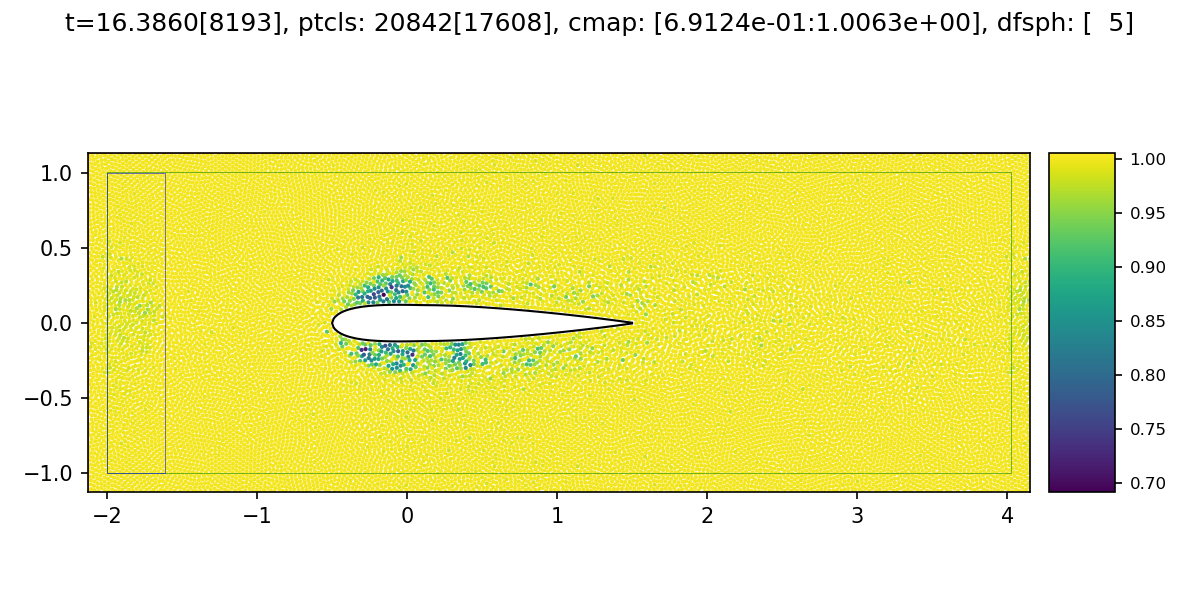

interactive(children=(IntSlider(value=8192, description='steps', max=8192, min=1), Button(description='Run Int…

In [115]:
# with profiler.profile(with_stack=True, profile_memory=True) as prof:  
boundaryPressureForces = []
boundaryFrictionForces = []
timeValues = []
def simFn(config, state):
    global boundaryPressureForces, boundaryFrictionForces
    incompressibleSimulation(config, state)
#     print(state['boundaryFrictionForce'], state['boundaryPressureForce'])
    boundaryPressureForces.append(state['boundaryPressureForce'].detach().cpu().numpy())
    boundaryFrictionForces.append(state['boundaryFrictionForce'].detach().cpu().numpy())
    timeValues.append(state['time'])
    
    
# simFn = lambda config, state: 

state, stepFn = setupSimulation(config, simFn, scatterPlotFn, 256, 256, saveFrames = True, figsize = (8,4))
# stepFn(8)
interact_manual(stepFn,steps=widgets.IntSlider(8192, min=1, max=8192, step=1));

In [131]:
dragForces = np.array(boundaryFrictionForces)
pressureForces = np.array(boundaryPressureForces)
times = np.array(timeValues)
dragForces = dragForces.reshape(times.shape[0],2)
pressureForces = pressureForces.reshape(times.shape[0],2)

In [132]:
mask = times > 2

dragForces = dragForces[mask]
pressureForces = pressureForces[mask]
times = times[mask]

In [133]:
height = np.max(np.array(vertices)[:,1]) - np.min(np.array(vertices)[:,1])
print(height)

0.244


In [134]:
dragForces[:,0] = 2 * dragForces[:,0] / 1000 * 1 * height
pressureForces[:,0] = 2 * pressureForces[:,0] / 1000 * 1 * height

dragForces[:,1] = 2 * dragForces[:,1] / 1000 * 1 * height
pressureForces[:,1] = 2 * pressureForces[:,1] / 1000 * 1 * height

<IPython.core.display.Javascript object>


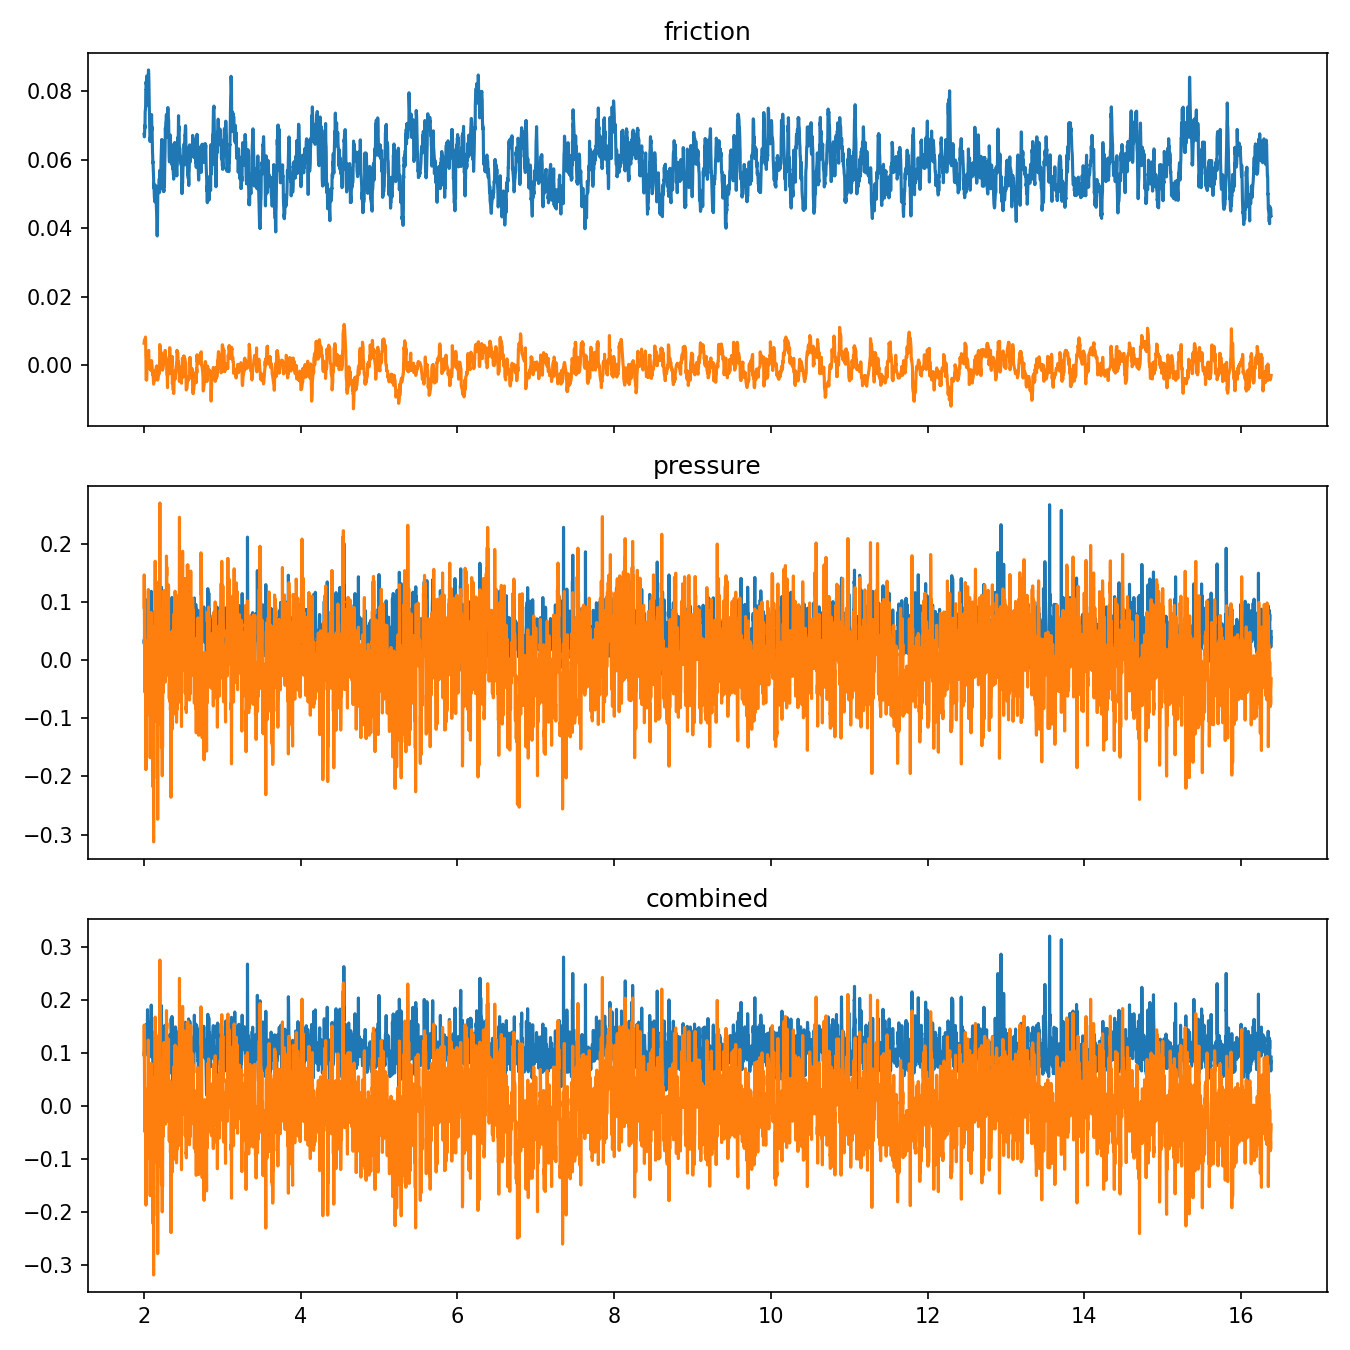

In [135]:
fig, axis = plt.subplots(3,1, figsize=(9,9), sharex = True, sharey = False, squeeze = False)

axis[0,0].set_title('friction')
axis[0,0].plot(times, dragForces[:,0], label = 'friction')
axis[0,0].plot(times, dragForces[:,1], label = 'friction')
# axis[0,0].plot(times, pressureForces[:,0], label = 'pressure')
# axis[0,0].plot(times, dragForces[:,0] + pressureForces[:,0], label = 'total')
# axis[0,0].legend()

axis[1,0].set_title('pressure')
axis[1,0].plot(times, pressureForces[:,0], label = 'pressure')
axis[1,0].plot(times, pressureForces[:,1], label = 'pressure')
# axis[1,0].plot(times, dragForces[:,1] , label = 'friction')
# axis[1,0].plot(times, pressureForces[:,1], label = 'pressure')
# axis[1,0].plot(times, dragForces[:,1] + pressureForces[:,1], label = 'total')
# axis[1,0].legend()

axis[2,0].set_title('combined')
axis[2,0].plot(times, pressureForces[:,0] + dragForces[:,0], label = 'pressure')
axis[2,0].plot(times, pressureForces[:,1] + dragForces[:,1], label = 'pressure')
# axis[2,0].plot(times, np.linalg.norm(dragForces, axis = 1), label = 'friction')
# axis[2,0].plot(times, np.linalg.norm(pressureForces, axis = 1), label = 'pressure')
# axis[2,0].plot(times, np.linalg.norm(dragForces + pressureForces, axis = 1), label = 'total')
# axis[2,0].legend()

fig.tight_layout()

In [136]:

print(np.mean(pressureForces[:,0] + dragForces[:,0]))
print(np.mean(pressureForces[:,1] + dragForces[:,1]))

0.1021617
-0.00116897


In [ ]:
# counter = torch.zeros(state['numParticles'], dtype=torch.int64).to(config['device'])
# uidCounter = scatter(torch.ones(state['numParticles'], dtype=torch.int64).to(config['device']), state['UID'], dim = 0, dim_size=state['realParticles'])

# virtualMin = config['domain']['virtualMin']
# virtualMax = config['domain']['virtualMax']
# if config['domain']['periodicX']:
#     counter[state['fluidPosition'][:,0] < virtualMin[0]] = -1
#     counter[state['fluidPosition'][:,0] >= virtualMax[0]] = -1
# if config['domain']['periodicY']:        
#     counter[state['fluidPosition'][:,1] < virtualMin[1]] = -1    
#     counter[state['fluidPosition'][:,1] >= virtualMax[1]] = -1
    
# deletionCounter = scatter(counter, state['UID'], dim = 0, dim_size=state['realParticles'])
# actualCounter = uidCounter + deletionCounter
# problematicUIDs = state['UID'][:state['realParticles']][actualCounter != 1]
# indices = torch.ones(state['numParticles'], dtype = torch.int64, device=config['device']) * -1
# indices[counter != -1] = state['UID'][counter != -1]

# tempUIDs = torch.arange(state['numParticles'], dtype=torch.int64, device=config['device'])
# for uid in problematicUIDs:
#     relevantIndices = tempUIDs[state['UID'] == uid]
#     relevantPositions = state['fluidPosition'][relevantIndices,:]
#     clippedPositions = state['fluidPosition'][relevantIndices,:]
#     clippedPositions[:,0] = torch.clamp(clippedPositions[:,0], min = config['domain']['virtualMin'][0], max = config['domain']['virtualMax'][0])
#     clippedPositions[:,1] = torch.clamp(clippedPositions[:,1], min = config['domain']['virtualMin'][1], max = config['domain']['virtualMax'][1])
#     distances = torch.linalg.norm(clippedPositions - relevantPositions, axis =1)
#     iMin = torch.argmin(distances)
#     for i in range(relevantIndices.shape[0]):
#         indices[relevantIndices[i]] = state['UID'][relevantIndices[i]] if i == iMin else -1
#         state['fluidPosition'][relevantIndices[i]] = clippedPositions[i] if i == iMin else state['fluidPosition'][relevantIndices[i]]

# indices = tempUIDs[indices != -1]

In [ ]:
state['ghostIndices'].shape
fullIndices = torch.arange(state['numParticles'], dtype= torch.int64, device=config['device'])

indices = torch.arange(state['realParticles'], dtype= torch.int64, device=config['device'])
indices = torch.cat((indices, state['ghostIndices'][state['ghostIndices']!=-1]))

uniqueIndices = set(indices.detach().cpu().numpy().tolist())

realParticles = filterVirtualParticles(state['fluidPosition'], config)

newUniqueIndices = set(indices[realParticles].detach().cpu().numpy().tolist())

difference = torch.tensor(list(uniqueIndices - newUniqueIndices), dtype=torch.int64, device=config['device'])
print(difference)
print(state['realParticles'])
print(state['numParticles'])
print(realParticles.shape)
temp3 = [x for x in uniqueIndices if x not in newUniqueIndices]
print(temp3)

# for d in difference:
#     print('Difference detected for particle', d)
#     print(fullIndices[indices ==d])
#     ind = fullIndices[indices == d]
#     for i in ind:
#         printParticle(i, state)


In [ ]:
# print(state['fluidDensity'])

In [ ]:
# if 'boundaryNeighbors' in state and state['boundaryNeighbors'] != None:
#     neighbors = state['boundaryNeighbors']
#     i = neighbors[0]
#     b = neighbors[1]
#     sdfs = state['boundaryDistances']
#     sdfgrads = state['boundaryGradients']
    
# #     print(i.shape)
# #     print(b.shape)
# #     print(sdfs.shape)
# #     print(sdfgrads.shape)
    
#     fluidVelocity = state['fluidVelocity'][i]
    
# #     print(fluidVelocity.shape)
    
#     fluidVelocityOrthogonal = torch.einsum('nd, nd -> n', fluidVelocity, sdfgrads)[:,None] * sdfgrads
#     fluidVelocityParallel = fluidVelocity - fluidVelocityOrthogonal
# #     print(fluidVelocity)
# #     print(fluidVelocityOrthogonal)
# #     print(fluidVelocityParallel)
#     velocities = []
#     for sb in config['solidBoundary']:
#         if 'velocity' in sb:
#             velocities.append(torch.tensor(sb['velocity'],device=config['device'],dtype=config['precision']))
#         else:
#             velocities.append(torch.tensor([0,0],device=config['device'],dtype=config['precision']))
            
#     boundaryVelocities = torch.stack(velocities)
#     fac = config['viscosityConstant'] * state['fluidRestDensity'][i]
#     rho_i = state['fluidDensity'][i] * state['fluidRestDensity'][i]
#     rho_b = state['fluidRestDensity'][i]
    
#     v_ib = boundaryVelocities[b] - fluidVelocityParallel
    
#     k = state['boundaryIntegrals']
    
#     term = (fac / (rho_i + rho_b))[:,None] * v_ib
    
#     correction = scatter(term, i, dim = 0, dim_size=state['numParticles'], reduce='add')
#     state['fluidVelocity'] += correction
    
    
    
    

    

In [ ]:

# import sys
# original_stdout = sys.stdout # Save a reference to the original standard output

# with open('profile.txt', 'w') as f:
#     sys.stdout = f # Change the standard output to the file we created.
#     print(prof.key_averages().table(sort_by='cpu_time_total'))
#     sys.stdout = original_stdout # Reset the standard output to its original value


# prof.export_chrome_trace("trace.json")


In [ ]:
# key_avg = prof.key_averages()

In [ ]:
# print(type(key_avg))

In [ ]:
# print(key_avg.table(sort_by='cpu_time_total'))